###### Credit : superdatascience.com

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data

In [31]:
crimes = pd.read_csv('Chicago Crime.csv')

In [3]:
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10887077,JA196832,01/01/2017 12:01:00 AM,073XX N OAKLEY AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,False,...,49,2,20,NaN,NaN,2017,03/23/2017 03:53:53 PM,NaN,NaN,NaN
1,10883971,JA193683,01/01/2017 12:01:00 AM,0000X E 103RD PL,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,9,49,02,NaN,NaN,2017,03/21/2017 03:50:39 PM,NaN,NaN,NaN
2,10883969,JA193696,01/01/2017 12:01:00 AM,075XX S KINGSTON AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,APARTMENT,False,False,...,7,43,20,NaN,NaN,2017,03/21/2017 03:50:39 PM,NaN,NaN,NaN
3,10878960,JA188281,01/01/2017 12:01:00 AM,009XX E 86TH ST,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,False,...,8,44,02,NaN,NaN,2017,03/17/2017 03:52:20 PM,NaN,NaN,NaN
4,10878804,JA187911,01/01/2017 12:01:00 AM,053XX N SHERIDAN RD,1195,DECEPTIVE PRACTICE,FINAN EXPLOIT-ELDERLY/DISABLED,APARTMENT,False,False,...,48,77,11,NaN,NaN,2017,03/16/2017 03:53:03 PM,NaN,NaN,NaN


In [4]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39065 entries, 0 to 39064
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    39065 non-null  int64  
 1   Case Number           39065 non-null  object 
 2   Date                  39065 non-null  object 
 3   Block                 39065 non-null  object 
 4   IUCR                  39065 non-null  object 
 5   Primary Type          39065 non-null  object 
 6   Description           39065 non-null  object 
 7   Location Description  38948 non-null  object 
 8   Arrest                39065 non-null  bool   
 9   Domestic              39065 non-null  bool   
 10  Beat                  39065 non-null  int64  
 11  District              39065 non-null  int64  
 12  Ward                  39065 non-null  int64  
 13  Community Area        39065 non-null  int64  
 14  FBI Code              39065 non-null  object 
 15  X Coordinate       

In [5]:
crimes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,39065.0,1.080743e+07,541147.890628,2.305900e+04,1.081895e+07,1.083481e+07,1.084974e+07,1.088999e+07
Beat,39065.0,1.159020e+03,696.580344,1.110000e+02,6.130000e+02,1.033000e+03,1.722000e+03,2.535000e+03
District,39065.0,1.136183e+01,6.959032,1.000000e+00,6.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
Ward,39065.0,2.313332e+01,14.027629,1.000000e+00,1.000000e+01,2.400000e+01,3.400000e+01,5.000000e+01
Community Area,39065.0,3.679662e+01,21.404500,1.000000e+00,2.300000e+01,3.100000e+01,5.500000e+01,7.700000e+01
X Coordinate,38292.0,1.164413e+06,16170.294287,1.094231e+06,1.152698e+06,1.165977e+06,1.176327e+06,1.204911e+06
Y Coordinate,38292.0,1.886645e+06,31285.098188,1.813925e+06,1.859284e+06,1.894172e+06,1.909566e+06,1.951493e+06
Year,39065.0,2.017000e+03,0.000000,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03
Latitude,38292.0,4.184455e+01,0.086036,4.164461e+01,4.176919e+01,4.186543e+01,4.190754e+01,4.202254e+01
Longitude,38292.0,-8.767216e+01,0.058865,-8.792891e+01,-8.771467e+01,-8.766621e+01,-8.762855e+01,-8.752527e+01


## Cleansing

##### Missing Values

In [6]:
crimes.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    117
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            0
FBI Code                  0
X Coordinate            773
Y Coordinate            773
Year                      0
Updated On                0
Latitude                773
Longitude               773
Location                773
dtype: int64

In [32]:
print('Missing value percentage of total')
print('\n')
print('For Location Description Column : {:.1f} %'.format(100 * (crimes['Location Description'].isnull().sum()/len(crimes)), 1))
print('For Other Columns with Missing Values : {:.1f} %'.format(100 * (crimes['X Coordinate'].isnull().sum()/len(crimes)), 1))

Missing value percentage of total


For Location Description Column : 0.3 %
For Other Columns with Missing Values : 2.0 %


In [16]:
# We will drop these missing values
crimes.dropna(axis = 0, inplace = True)

In [17]:
crimes.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

##### Datetime Object

In [18]:
crimes['Date'].min()

'01/01/2017 01:00:00 AM'

In [19]:
crimes['Date'].max()

'02/27/2017 12:55:00 PM'

In [20]:
# Convert datetime object
crimes['Date'] = pd.to_datetime(crimes['Date'].str[0:10])

In [21]:
crimes.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                   int64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

In [22]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38192 entries, 11 to 39064
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    38192 non-null  int64         
 1   Case Number           38192 non-null  object        
 2   Date                  38192 non-null  datetime64[ns]
 3   Block                 38192 non-null  object        
 4   IUCR                  38192 non-null  object        
 5   Primary Type          38192 non-null  object        
 6   Description           38192 non-null  object        
 7   Location Description  38192 non-null  object        
 8   Arrest                38192 non-null  bool          
 9   Domestic              38192 non-null  bool          
 10  Beat                  38192 non-null  int64         
 11  District              38192 non-null  int64         
 12  Ward                  38192 non-null  int64         
 13  Community Area      

## Analysis

##### 12 Most Common Crimes

In [23]:
crimes['Primary Type'].nunique()

30

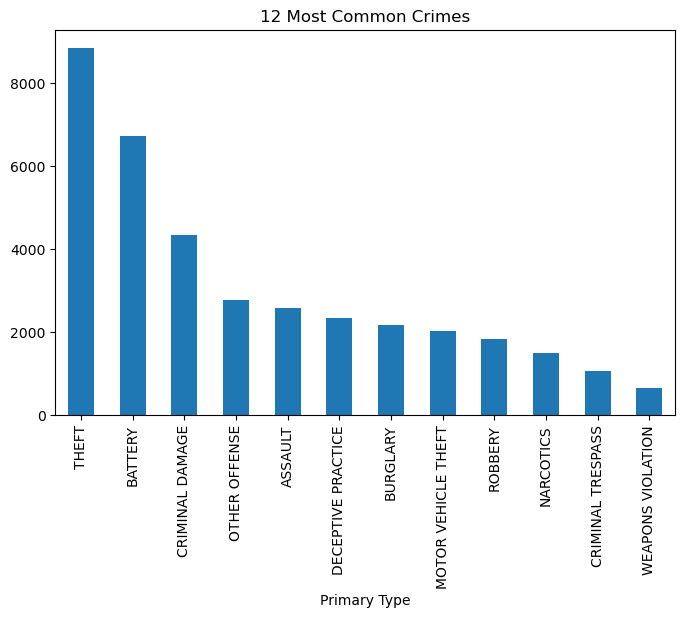

In [24]:
plt.figure(figsize = (8, 5))
crimes['Primary Type'].value_counts().head(12).plot(kind = 'bar')

plt.title('12 Most Common Crimes')
plt.show()

##### Crime Types that have Median above 50 Crimes a Day

In [25]:
count_by_date = pd.DataFrame(crimes.groupby(['Primary Type', 'Date']).count()['ID'].reset_index())
count_by_date.columns = ['Crime Type', 'Date', 'Count']

In [26]:
count_by_date.head()

,Crime Type,Date,Count
0,ARSON,2017-01-02,3
1,ARSON,2017-01-03,1
2,ARSON,2017-01-04,1
3,ARSON,2017-01-06,1
4,ARSON,2017-01-08,1


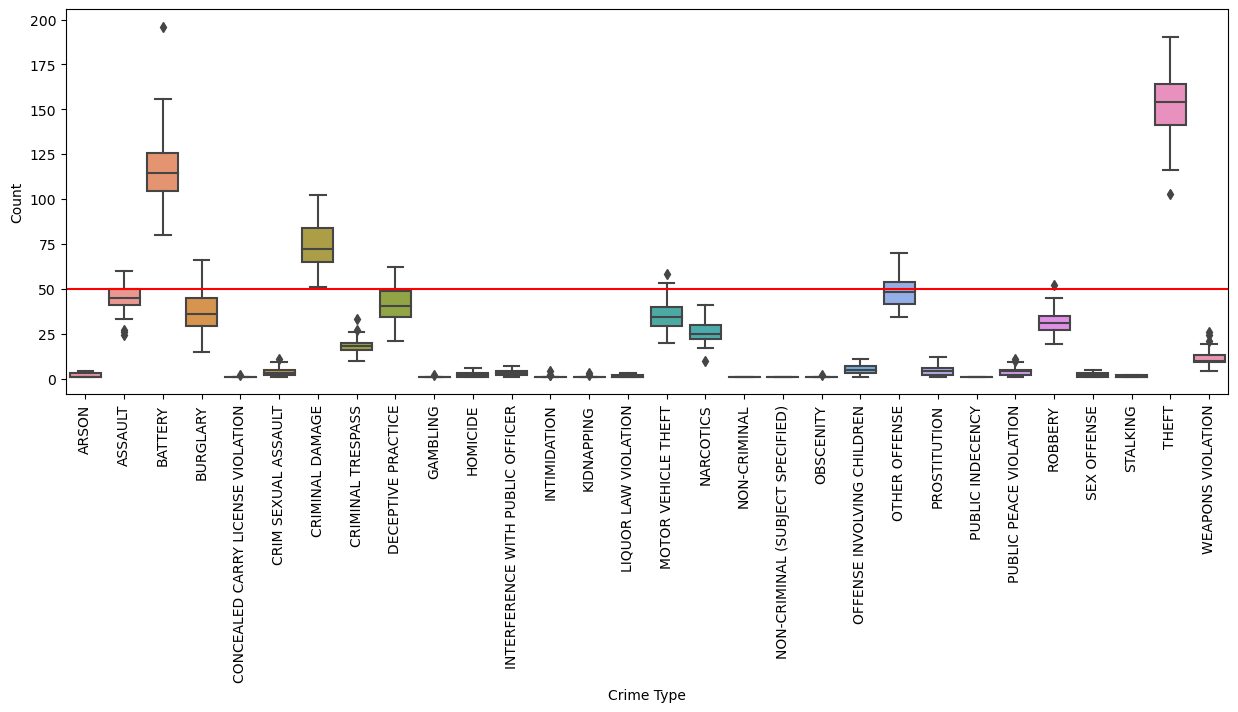

In [27]:
plt.figure(figsize = (15, 5))
sns.boxplot(count_by_date, x = 'Crime Type', y = 'Count')

plt.axhline(50, color = 'red')
plt.xticks(rotation = 90)
plt.show()

* Battery, Criminal Damage, Theft crimes pass the median of 50 crimes per day
* In terms of battery offenses, there are 2 days with outlier behavior where crime reports have occurred more than 160 times in a day in Chicago
* As to theft offenses, having a day with less than 125 crime reports is considered outlining behavior

##### Geographic Areas of Battery, Criminal Damage, Theft Incidents

In [28]:
theft = crimes[crimes['Primary Type'] == 'THEFT']
criminal_damage = crimes[crimes['Primary Type'] == 'CRIMINAL DAMAGE']
battery = crimes[crimes['Primary Type'] == 'BATTERY']

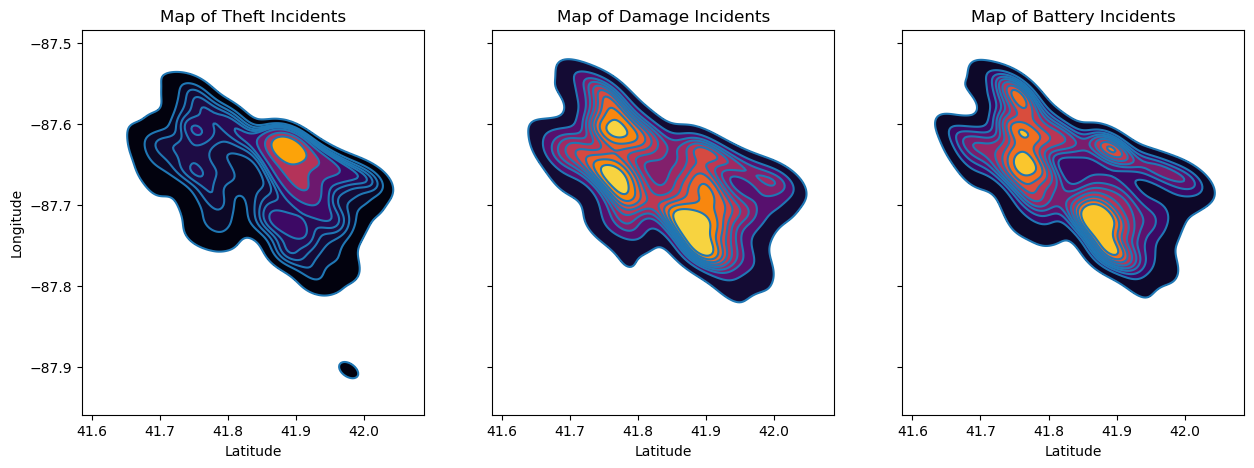

In [29]:
f, axes = plt.subplots(1, 3, figsize = (15, 5), sharex = True, sharey = True)

k1 = sns.kdeplot(theft, x = 'Latitude', y = 'Longitude', ax = axes[0], shade = True, cmap = 'inferno')
k1_contour = sns.kdeplot(theft, x = 'Latitude', y = 'Longitude', ax = axes[0])

k2 = sns.kdeplot(criminal_damage, x = 'Latitude', y = 'Longitude', ax = axes[1], shade = True, cmap = 'inferno')
k2_contour = sns.kdeplot(criminal_damage, x = 'Latitude', y = 'Longitude', ax = axes[1])

k3 = sns.kdeplot(battery, x = 'Latitude', y = 'Longitude', ax = axes[2], shade = True, cmap = 'inferno')
k3_contour = sns.kdeplot(battery, x = 'Latitude', y = 'Longitude', ax = axes[2])

k1.title.set_text('Map of Theft Incidents')
k2.title.set_text('Map of Damage Incidents')
k3.title.set_text('Map of Battery Incidents')

plt.show()

* Battery and criminal damage incidents seem closely related geographically (incidents happening often in the south-east, west area)
* Theft incidents are predominent in the northern area of Chicago

#####  Calculate Central Coordinates

In [47]:
# Theft Incidents
print('Theft Central Coordinates : ({:f}, {:f})'.format(theft['Latitude'].mean(), theft['Longitude'].mean()))

Theft Central Coordinates : (41.862720, -87.667282)


In [48]:
# Criminal Damage Incidents
print('Criminal Damage Central Coordinates : ({:f}, {:f})'.format(criminal_damage['Latitude'].mean(), criminal_damage['Longitude'].mean()))

Criminal Damage Central Coordinates : (41.837694, -87.673674)


In [50]:
# Battery Incidents
print('Battery Central Coordinates : ({:f}, {:f})'.format(battery['Latitude'].mean(), battery['Longitude'].mean()))

Battery Central Coordinates : (41.831977, -87.668571)
